In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [20]:
# Prepare the dataset for training

# Image augmentation to prevent overfitting
from keras.preprocessing.image import ImageDataGenerator

# Copied code from the Keras API library
# The rescale parameter is the scale the pixels to ensure the values are in [0, 1] range
train_datagen = ImageDataGenerator( 
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Load the training dataset
train_set = train_datagen.flow_from_directory(
        '../dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [21]:
# Preprocess the testing set
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
        '../dataset/test_set/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [4]:
# Build the CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[64, 64, 3]))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation="relu"))
cnn.add(Dense(units=1, activation="sigmoid"))

In [5]:
# Compile the CNN
cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
cnn.fit(x=train_set, validation_data=test_set, epochs=25)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 63 steps
Epoch 1/25
250/250 [==============================] - 31s 123ms/step - loss: 0.6803 - accuracy: 0.5514 - val_loss: 0.6420 - val_accuracy: 0.6380
Epoch 2/25
250/250 [==============================] - 31s 122ms/step - loss: 0.6148 - accuracy: 0.6626 - val_loss: 0.5961 - val_accuracy: 0.6865
Epoch 3/25
250/250 [==============================] - 31s 122ms/step - loss: 0.5660 - accuracy: 0.7044 - val_loss: 0.5420 - val_accuracy: 0.7205
Epoch 4/25
250/250 [==============================] - 31s 123ms/step - loss: 0.5316 - accuracy: 0.7354 - val_loss: 0.5185 - val_accuracy: 0.7495
Epoch 5/25
250/250 [==============================] - 31s 123ms/step - loss: 0.5078 - accuracy: 0.7495 - val_loss: 0.5218 - val_accuracy: 0.7375
Epoch 6/25
250/250 [==============================] - 31s 125ms/step - loss: 0.4911 - accuracy: 0.7614 - val_loss: 0.4760 - val_accuracy: 0.7735
Epoch 7/25
250/250 [=================

In [7]:
# Making a single prediction

from keras.preprocessing import image

test_image = image.load_img('../dataset/single_prediction/cat_or_dog_1.jpg', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
train_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [8]:
print(prediction)

dog


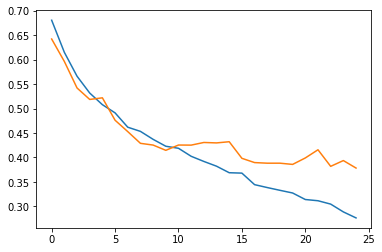

In [11]:
model_history = cnn.history.history

import matplotlib.pyplot as plt
plt.plot(model_history['loss'], label="loss")
plt.plot(model_history['val_loss'], label="validation loss")
plt.show()

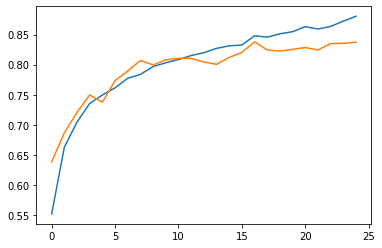

In [10]:
plt.plot(model_history['accuracy'], label="accuracy")
plt.plot(model_history['val_accuracy'], label="validation accuracy")
plt.show()